**Potato Disease Classification**
**This project focuses on classification and prediction of potato crop health looking on the appearance of their leaves. There are mainly three categories: Healthy Potato, Early Blight and Late Blight**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=4 #50

In [ ]:
dataset_path='/content/drive/MyDrive/PlantVillage'

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
     dataset_path,
     shuffle=True,
     image_size=(IMAGE_SIZE, IMAGE_SIZE),
     batch_size=BATCH_SIZE
)

Found 2156 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 1 2 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1]


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])
  print(label_batch.numpy())

tf.Tensor(
[[[143. 137. 141.]
  [163. 157. 161.]
  [153. 147. 151.]
  ...
  [183. 178. 185.]
  [187. 182. 189.]
  [186. 181. 188.]]

 [[160. 154. 158.]
  [150. 144. 148.]
  [133. 127. 131.]
  ...
  [184. 179. 186.]
  [185. 180. 187.]
  [183. 178. 185.]]

 [[168. 162. 166.]
  [152. 146. 150.]
  [130. 124. 128.]
  ...
  [189. 184. 191.]
  [188. 183. 190.]
  [186. 181. 188.]]

 ...

 [[135. 130. 136.]
  [123. 118. 124.]
  [149. 144. 150.]
  ...
  [167. 166. 174.]
  [173. 172. 180.]
  [174. 173. 181.]]

 [[138. 133. 139.]
  [159. 154. 160.]
  [152. 147. 153.]
  ...
  [156. 156. 164.]
  [158. 158. 166.]
  [158. 158. 166.]]

 [[141. 136. 142.]
  [175. 170. 176.]
  [118. 113. 119.]
  ...
  [163. 163. 171.]
  [170. 170. 178.]
  [173. 173. 181.]]], shape=(256, 256, 3), dtype=float32)
[0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].numpy())
  print(label_batch.numpy())

[[[194. 189. 195.]
  [193. 188. 194.]
  [196. 191. 197.]
  ...
  [197. 192. 198.]
  [201. 196. 202.]
  [202. 197. 203.]]

 [[195. 190. 196.]
  [193. 188. 194.]
  [196. 191. 197.]
  ...
  [194. 189. 195.]
  [196. 191. 197.]
  [198. 193. 199.]]

 [[197. 192. 198.]
  [195. 190. 196.]
  [197. 192. 198.]
  ...
  [192. 187. 193.]
  [192. 187. 193.]
  [194. 189. 195.]]

 ...

 [[142. 135. 142.]
  [158. 151. 158.]
  [167. 160. 167.]
  ...
  [169. 163. 173.]
  [178. 172. 182.]
  [173. 167. 177.]]

 [[165. 158. 165.]
  [156. 149. 156.]
  [158. 151. 158.]
  ...
  [157. 151. 161.]
  [170. 164. 174.]
  [163. 157. 167.]]

 [[161. 154. 161.]
  [145. 138. 145.]
  [156. 149. 156.]
  ...
  [141. 135. 145.]
  [155. 149. 159.]
  [144. 138. 148.]]]
[0 0 1 1 1 1 1 1 0 1 0 1 0 0 2 2 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1]


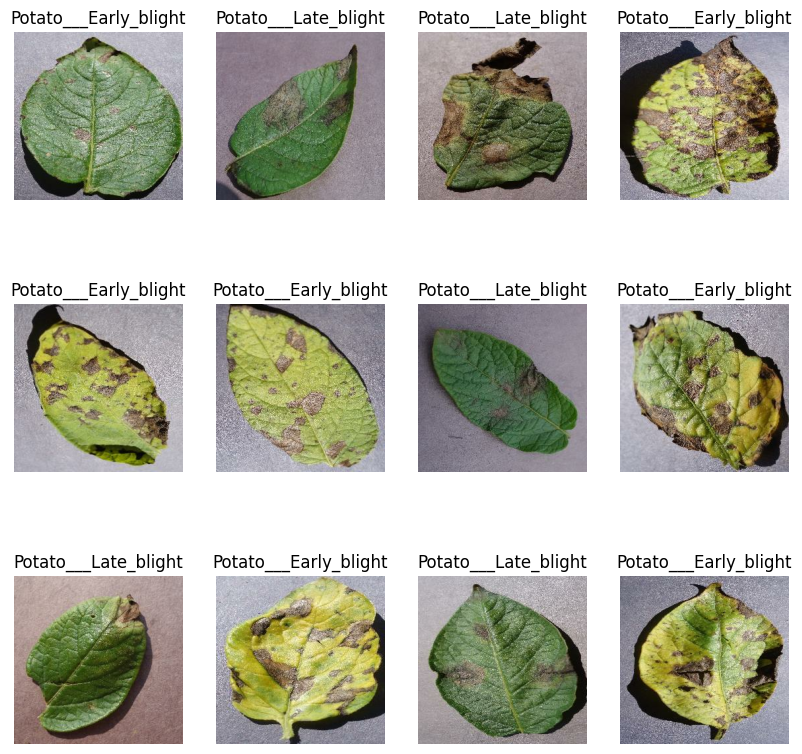

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)

In [ ]:
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_ds

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000 ):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=52)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)



  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
train_ds.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, None)    0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/4
54/54 [==============================] - 338s 4s/step - loss: 0.9011 - accuracy: 0.4848 - val_loss: 0.9058 - val_accuracy: 0.5521
Epoch 2/4
54/54 [==============================] - 228s 4s/step - loss: 0.6888 - accuracy: 0.6610 - val_loss: 0.4900 - val_accuracy: 0.7865
Epoch 3/4
54/54 [==============================] - 228s 4s/step - loss: 0.4511 - accuracy: 0.8138 - val_loss: 0.2977 - val_accuracy: 0.8958
Epoch 4/4
54/54 [==============================] - 243s 5s/step - loss: 0.3388 - accuracy: 0.8624 - val_loss: 0.2257 - val_accuracy: 0.9115


In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 18s 950ms/step - loss: 0.2420 - accuracy: 0.9062


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 4, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

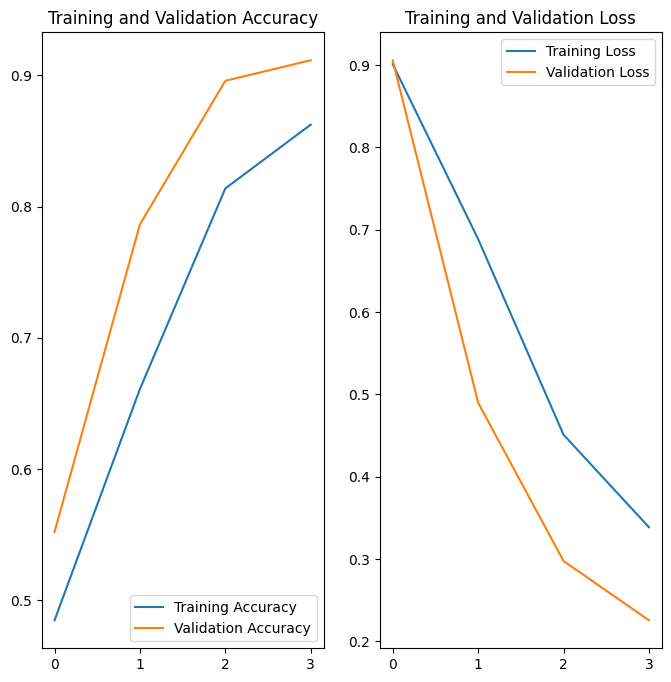

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Late_blight


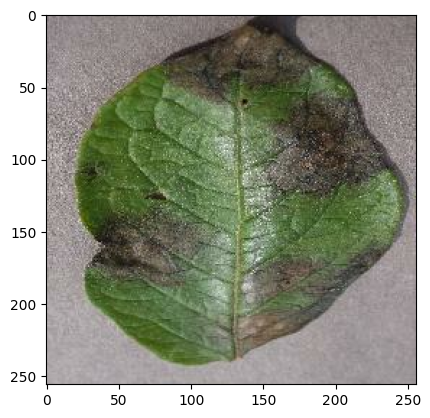

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:

def predict(model, img):
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


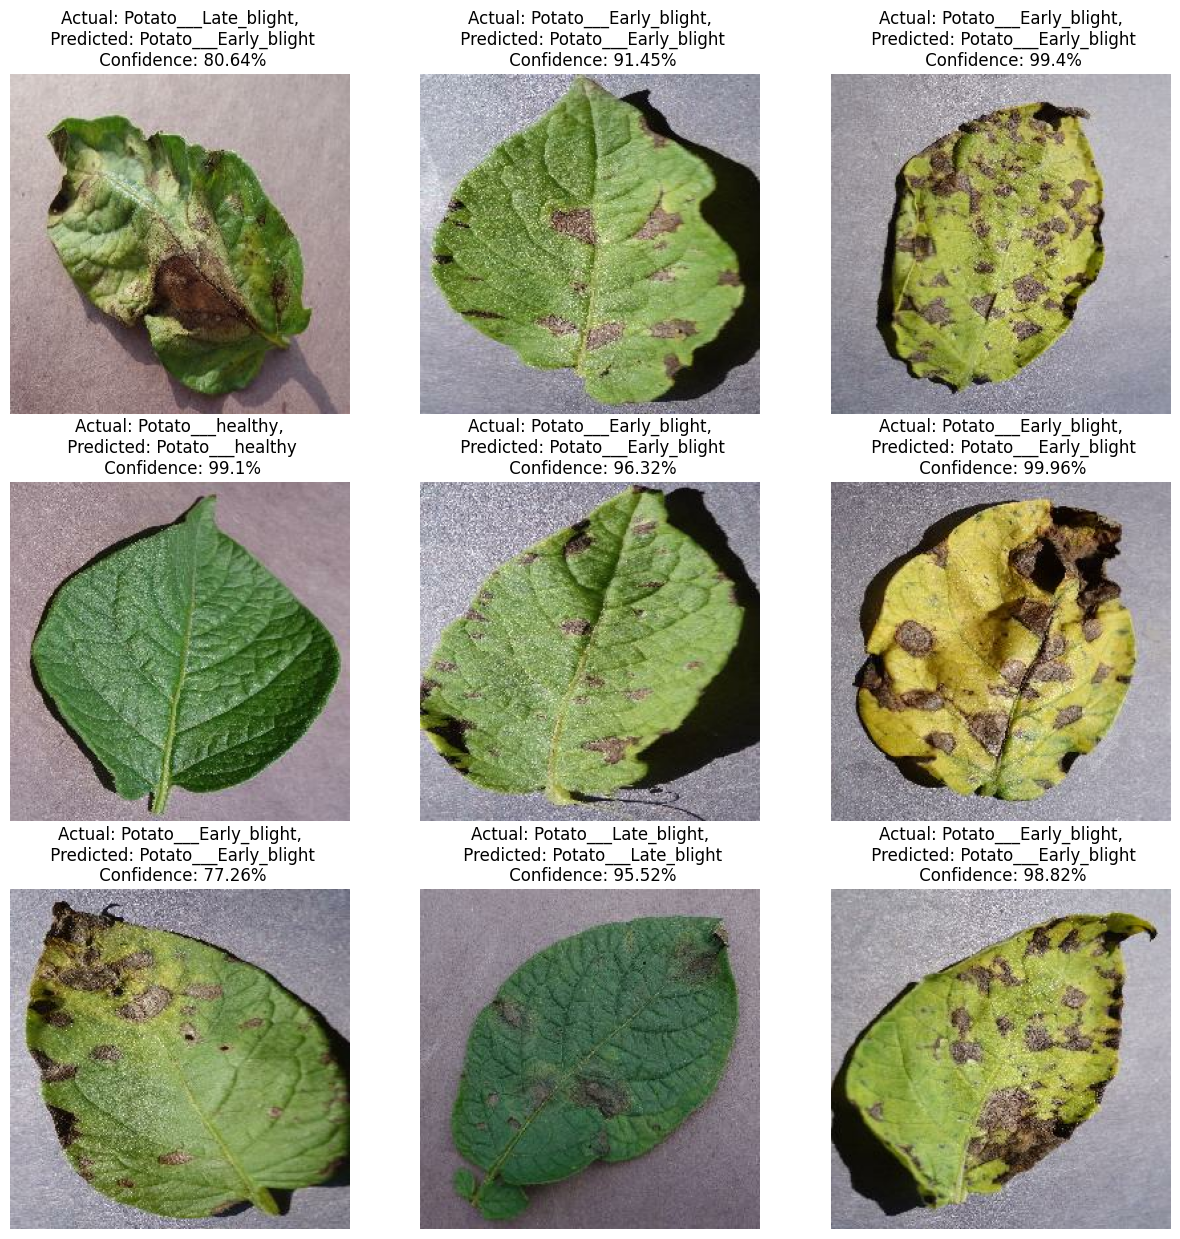

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}\n Confidence: {confidence}%")

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

1/1 [==============================] - 0s 47ms/step


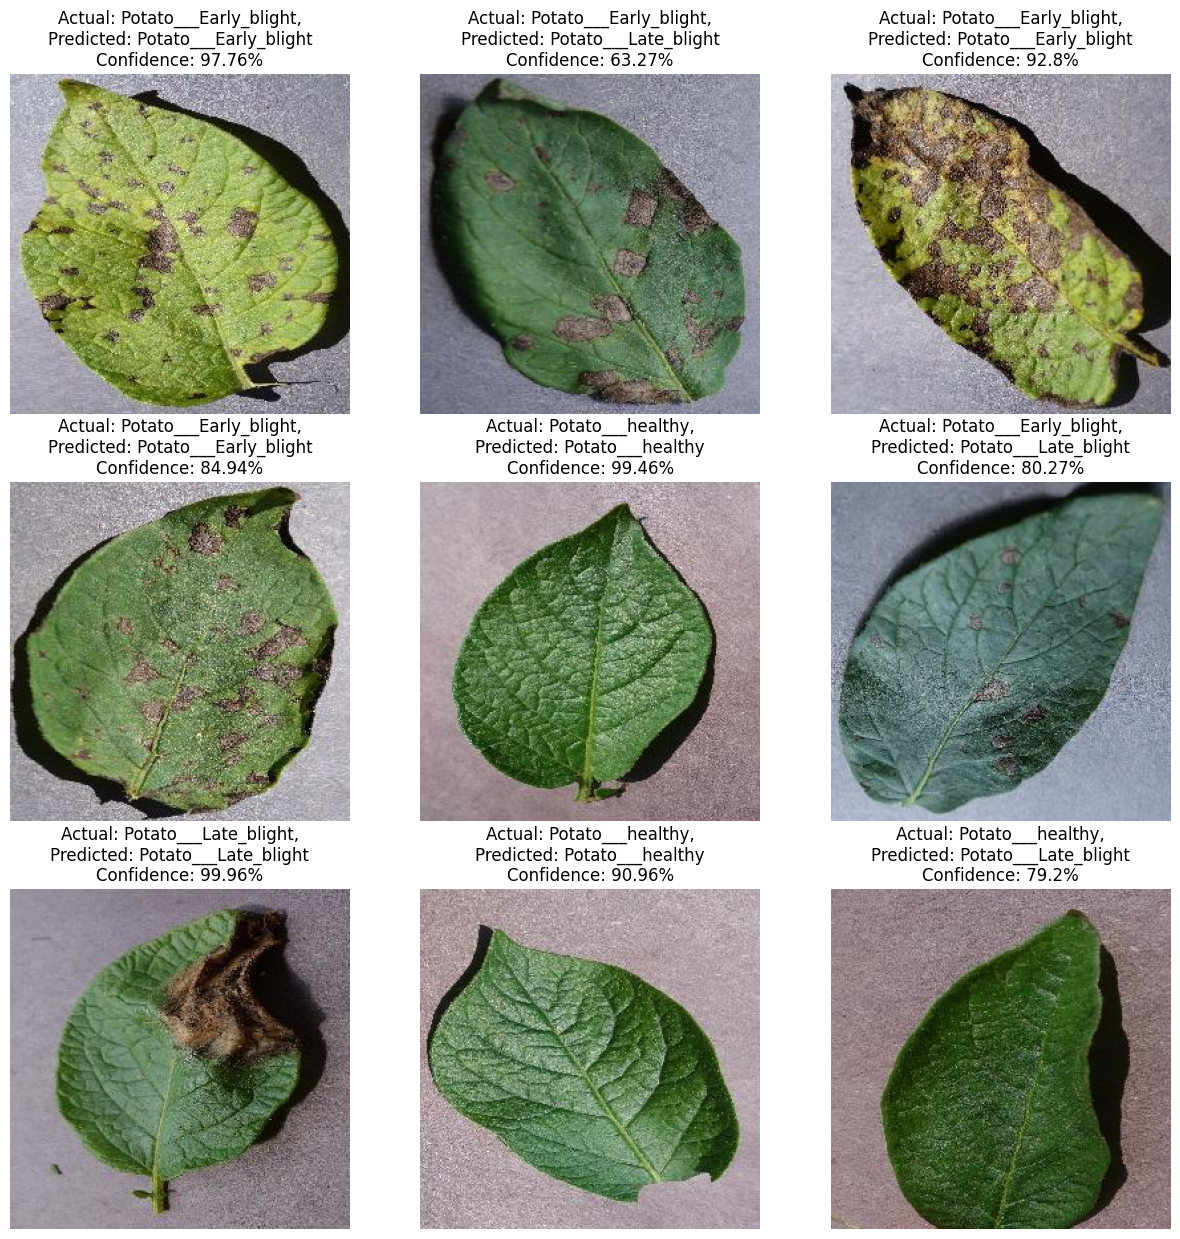

In [ ]:
plt.show()